In [1]:
import numpy as np
import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, colors
# Make use of TeX\ufeff

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})
#plt.rcParams['text.usetex'] = True

In [2]:
#everything in units where c=hbar=1 and the energies are in MeV
me = 0.511
mmu=105.658
alpha_em = 1/137.
e = np.sqrt(alpha_em*4*np.pi)
print(e)
Mpl = 2.435e21 #reduced planck mass (i.e. factor of 8 pi)
cm2_conv = 2.5e21
costhetaW = 0.881

0.30286190409413793


In [3]:
def load_csv(file_path):
    """
    Load a CSV file into a numpy array.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        numpy.ndarray: The numpy array containing the data.
    """
    try:
        data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
        return data
    except Exception as e:
        print("Error loading CSV file:", e)
        return None
    
def read_dat_file(filename):
    mlist = []  # List for first column
    Qlist = []  # List for second column
    
    try:
        with open(filename, 'r') as f:
            # Skip header line
            next(f)
            
            # Read actual data
            for line in f:
                # Split each line into columns
                columns = line.split()
                
                # Assuming the first two values are float data
                if len(columns) >= 2:  # Ensure at least 2 columns exist
                    mlist.append(float(columns[0]))
                    Qlist.append(float(columns[1]))

        return mlist, Qlist
    except IOError:
        print(f"Error: File '{filename}' not found or cannot be read.")

In [5]:
mlist1 = np.logspace(-6,0,num = 25)
freeze_in = np.loadtxt("datadump/Abundance-1-data.txt")
freeze_in_func = scipy.interpolate.interp1d(mlist1,freeze_in, kind = "quadratic",fill_value="extrapolate")

In [6]:
filename = 'datadump/data_lightquarksnonrel.dat'  # Replace with your actual file path
mlist, Qlist= read_dat_file(filename)
mlist = np.array(mlist)*10**3
Qlist = np.array(Qlist)/(e*costhetaW)

In [9]:
mlist2=np.logspace(-1.1,1,num=20)
Qm15 = np.zeros(20)
for i in range(20):
    info1 = irr.relic(1.8e-11,mlist2[i])
    Qm15[i] = np.sqrt(1/info1)*1.8e-11

/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:217: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)


In [10]:
print(Qm15)
print(Qlist)
#-4 index from Qm15 matches with 2nd index with Saniyas line

[3.10227877e-11 2.91027352e-11 2.71448383e-11 2.51595633e-11
 2.31743474e-11 2.12331981e-11 1.94038927e-11 1.78769186e-11
 1.74961113e-11 1.77288371e-11 1.80305484e-11 1.83758936e-11
 1.87732991e-11 1.92534723e-11 1.98450816e-11 2.05897220e-11
 2.14842891e-11 2.22726479e-11 2.35230986e-11 2.57141586e-11]
[2.13213833e-11 2.14075833e-11 2.14825398e-11 2.15462528e-11
 2.16024702e-11 2.16511920e-11 2.16999137e-11 2.17448876e-11
 2.17973572e-11 2.18423311e-11 2.18910528e-11 2.19435224e-11
 2.19997398e-11 2.20597050e-11 2.21271659e-11 2.22058702e-11
 2.22883224e-11 2.23820181e-11 2.24794616e-11 2.25918963e-11
 2.27155746e-11 2.28542442e-11 2.30041572e-11 2.31653138e-11
 2.33377138e-11 2.35213572e-11 2.37124964e-11 2.39073833e-11
 2.41060181e-11 2.42971573e-11 2.44770529e-11 2.46419573e-11
 2.47768790e-11 2.48818182e-11 2.49417834e-11 2.49567747e-11
 2.49230442e-11 2.48480877e-11 2.47543921e-11 2.46981747e-11
 2.48855660e-11 2.53428008e-11 2.59124704e-11 2.65196182e-11
 2.71567487e-11 2.77826

In [30]:
# patching
print(mlist2)
print(Qm15)
print("")
print(mlist)
print(Qlist)
# freeze-in line index of -3 patched with addition index of 6
np.savetxt("datadump/fullrangefreezeinline.txt",np.array([mlist1,freeze_in]))

[ 0.07943282  0.10245339  0.13214558  0.17044291  0.21983926  0.28355126
  0.36572773  0.47171991  0.60842987  0.78475997  1.0121926   1.30553787
  1.68389803  2.1719114   2.80135676  3.61322276  4.66037703  6.01100886
  7.75306963 10.        ]
[3.10227877e-11 2.91027352e-11 2.71448383e-11 2.51595633e-11
 2.31743474e-11 2.12331981e-11 1.94038927e-11 1.78769186e-11
 1.74961113e-11 1.77288371e-11 1.80305484e-11 1.83758936e-11
 1.87732991e-11 1.92534723e-11 1.98450816e-11 2.05897220e-11
 2.14842891e-11 2.22726479e-11 2.35230986e-11 2.57141586e-11]

[  1.122   1.259   1.413   1.585   1.778   1.995   2.239   2.512   2.818
   3.162   3.548   3.981   4.467   5.012   5.623   6.31    7.079   7.943
   8.913  10.     11.22   12.59   14.13   15.85   17.78   19.95   22.39
  25.12   28.18   31.62   35.48   39.81   44.67   50.12   56.23   63.1
  70.79   79.43   89.13  100.    112.2   125.9   141.3   158.5   177.8
 199.5   223.9   251.2   281.8   316.2   354.8   398.1   446.7   501.2  ]
[2.13213833e-1

In [33]:
arr = np.loadtxt("datadump/fullrangefreezeinline.txt")
print(len(arr[0]),len(arr[1]))

76 76


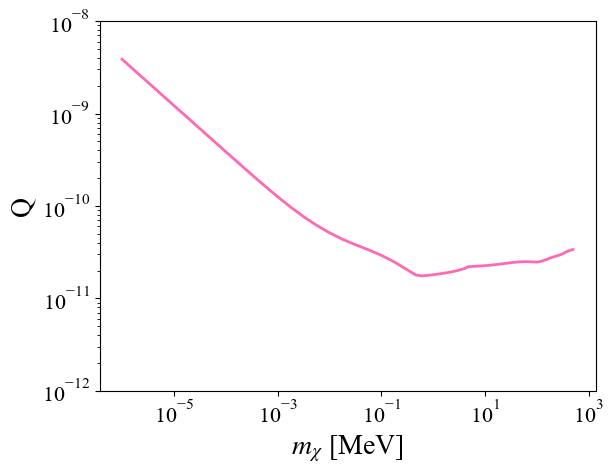

In [35]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)

#ax.loglog(mlist1, freeze_in,lw=5,c='IndianRed',label = r'm')
#ax.loglog(mlist, Qlist,lw=5,c='indigo',label = r'plasmon')
#ax.loglog(mlist2, Qm15,lw=5,c='olivedrab',label = r'plasmon')
ax.loglog(arr[0], arr[1],lw=2,c='hotpink',label = r'plasmon')

#ax.plot(mlist,np.linspace(0.1,0.1,num=50))
#ax.set_xscale("log")
ax.set_ylabel(r'Q', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)
#ax.set_title(r'$Plasma Frequency$', fontsize=18)
#ax.set_xlim([100,0.0001])
ax.set_ylim([1e-12, 1e-8])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)


#ax.legend(framealpha=1, loc='lower right', fontsize=8)
